<a href="https://colab.research.google.com/github/devpatel2086/Titenic01.jpynb/blob/main/TItenic01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
dataset = pd.read_csv("Titanic-Dataset.csv")

In [5]:
dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
dataset.shape

(891, 12)

In [7]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
dataset.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [10]:
print(dataset.describe())

print(dataset.describe(include=['O']))


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
                       Name   Sex  Ticket Cabin Embarked
count                   

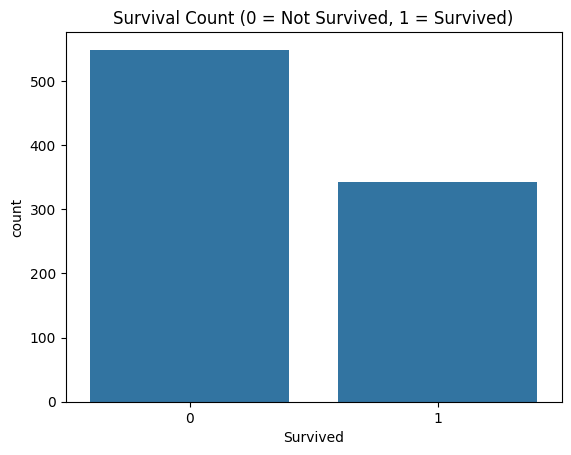

In [11]:
# Visualization

# 1. Survival Count
sns.countplot(x="Survived", data=dataset)
plt.title("Survival Count (0 = Not Survived, 1 = Survived)")
plt.show()



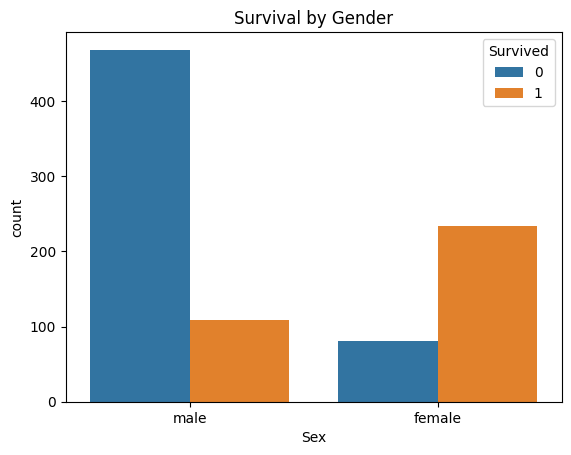

In [12]:
# 2. Survival by Gender
sns.countplot(x="Sex", hue="Survived", data=dataset)
plt.title("Survival by Gender")
plt.show()



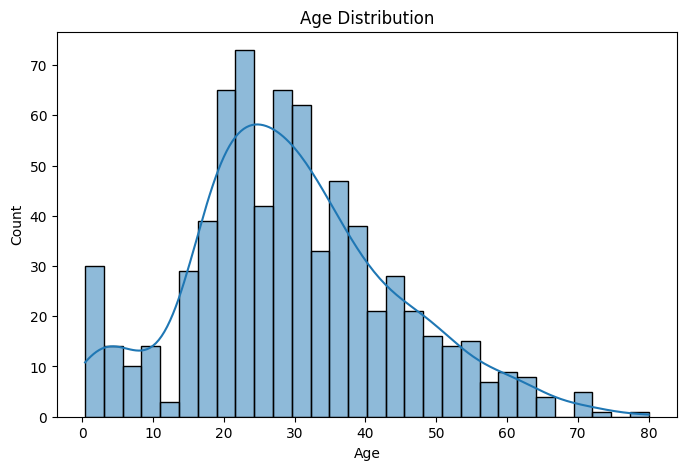

In [13]:
# 3. Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(dataset["Age"].dropna(), bins=30, kde=True)
plt.title("Age Distribution")
plt.show()



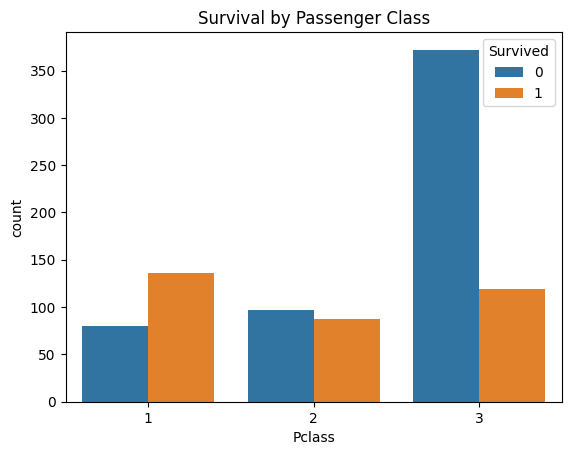

In [14]:
# 4. Survival by Passenger Class
sns.countplot(x="Pclass", hue="Survived", data=dataset)
plt.title("Survival by Passenger Class")
plt.show()



In [15]:
dataset.drop(columns=["Age"],inplace=True)

In [16]:
dataset.dropna(inplace=True)

In [17]:
dataset.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,0


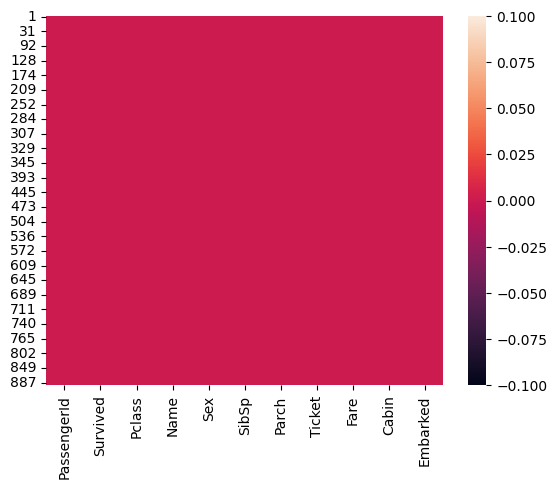

In [18]:
sns.heatmap(dataset.isnull())
plt.show()

In [19]:
# encoding

dataset["Cabin"].fillna(dataset["Cabin"].mode()[0],inplace=True)

/tmp/ipython-input-3758298343.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Cabin"].fillna(dataset["Cabin"].mode()[0],inplace=True)


In [20]:
en_data = dataset[["Sex","Cabin"]]

In [21]:
pd.get_dummies(en_data).info()

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, 1 to 889
Columns: 148 entries, Sex_female to Cabin_T
dtypes: bool(148)
memory usage: 30.8 KB


In [22]:
# scaling

dataset["PassengerId"].fillna(dataset["PassengerId"].mode()[0],inplace=True)

/tmp/ipython-input-1104889194.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["PassengerId"].fillna(dataset["PassengerId"].mode()[0],inplace=True)


/tmp/ipython-input-4163826982.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["PassengerId"])


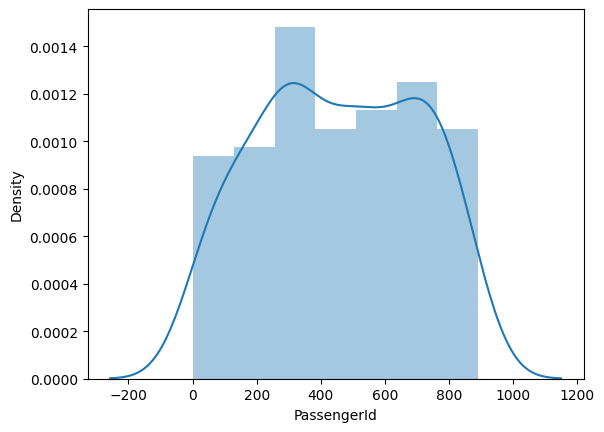

In [23]:
sns.distplot(dataset["PassengerId"])
plt.show()

In [24]:
dataset.describe()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,455.495050,0.663366,1.198020,0.445545,0.440594,76.103301
std,249.704228,0.473732,0.528205,0.630490,0.732294,74.759941
min,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,263.250000,0.000000,1.000000,0.000000,0.000000,28.959375
50%,457.500000,1.000000,1.000000,0.000000,0.000000,55.000000
75%,681.500000,1.000000,1.000000,1.000000,1.000000,89.776050
max,890.000000,1.000000,3.000000,3.000000,4.000000,512.329200


In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
ss = StandardScaler()
ss.fit(dataset[["PassengerId"]])

StandardScaler()

In [27]:
ss.transform(dataset[["PassengerId"]])

array([[-1.82064097],
       [-1.81261159],
       [-1.80056753],
       [-1.78450878],
       [-1.78049409],
       [-1.74034721],
       [-1.73231784],
       [-1.71625909],
       [-1.70020034],
       [-1.6158919 ],
       [-1.60786252],
       [-1.60384783],
       [-1.57574502],
       [-1.55968627],
       [-1.52355408],
       [-1.47136314],
       [-1.45530439],
       [-1.43924564],
       [-1.43523095],
       [-1.41515752],
       [-1.38304001],
       [-1.35092251],
       [-1.33084908],
       [-1.32683439],
       [-1.31077564],
       [-1.27865814],
       [-1.27464345],
       [-1.26661407],
       [-1.23048188],
       [-1.21843782],
       [-1.15821751],
       [-1.14215876],
       [-1.12610001],
       [-1.11405594],
       [-1.08996782],
       [-1.08193844],
       [-1.04982094],
       [-1.04580625],
       [-1.04179157],
       [-1.00164469],
       [-0.98558594],
       [-0.96149781],
       [-0.94945375],
       [-0.92536562],
       [-0.9012775 ],
       [-0

In [28]:
dataset["PassengerId_ss"] = pd.DataFrame(ss.transform(dataset[["PassengerId"]]),columns=["x"])

In [29]:
dataset.head(3)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PassengerId_ss
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,-1.812612
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,-1.784509
6,7,0,1,"McCarthy, Mr. Timothy J",male,0,0,17463,51.8625,E46,S,-1.732318


In [30]:
dataset.describe()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,PassengerId_ss
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,39.000000
mean,455.495050,0.663366,1.198020,0.445545,0.440594,76.103301,-0.002399
std,249.704228,0.473732,0.528205,0.630490,0.732294,74.759941,1.083215
min,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.812612
25%,263.250000,0.000000,1.000000,0.000000,0.000000,28.959375,-0.738683
50%,457.500000,1.000000,1.000000,0.000000,0.000000,55.000000,0.022101
75%,681.500000,1.000000,1.000000,1.000000,1.000000,89.776050,0.885258
max,890.000000,1.000000,3.000000,3.000000,4.000000,512.329200,1.636005


/tmp/ipython-input-1573961529.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["PassengerId"])
/tmp/ipython-input-1573961529.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["PassengerId_ss"])


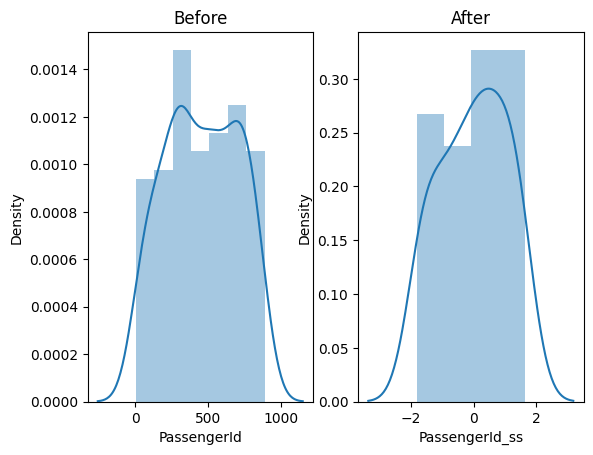

In [31]:
plt.Figure(figsize=(10,7))

plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset["PassengerId"])

plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset["PassengerId_ss"])
plt.show()

In [34]:
# Step 3: Model Development

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Select features and target
X = dataset.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId', 'PassengerId_ss'])  # remove irrelevant columns
y = dataset['Survived']

# Handle categorical variables (convert to numeric)
X = pd.get_dummies(X, drop_first=True)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# 1. Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

# 2. Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# 3. Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))

# Detailed report
print("\nClassification Report (Gradient Boosting):\n")
print(classification_report(y_test, y_pred_gb))

Logistic Regression Accuracy: 0.7560975609756098
Random Forest Accuracy: 0.7317073170731707
Gradient Boosting Accuracy: 0.8536585365853658

Classification Report (Gradient Boosting):

              precision    recall  f1-score   support

           0       0.60      0.75      0.67         8
           1       0.94      0.88      0.91        33

    accuracy                           0.85        41
   macro avg       0.77      0.81      0.79        41
weighted avg       0.87      0.85      0.86        41




Logistic Regression:
Accuracy: 0.7560975609756098
Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.88      0.58         8
           1       0.96      0.73      0.83        33

    accuracy                           0.76        41
   macro avg       0.70      0.80      0.71        41
weighted avg       0.86      0.76      0.78        41



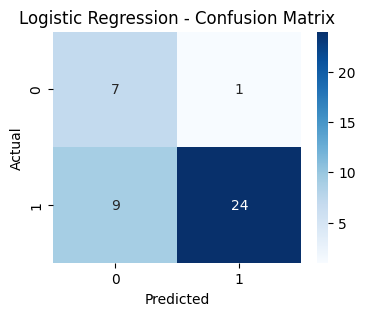


Random Forest:
Accuracy: 0.7317073170731707
Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.62      0.48         8
           1       0.89      0.76      0.82        33

    accuracy                           0.73        41
   macro avg       0.64      0.69      0.65        41
weighted avg       0.79      0.73      0.75        41



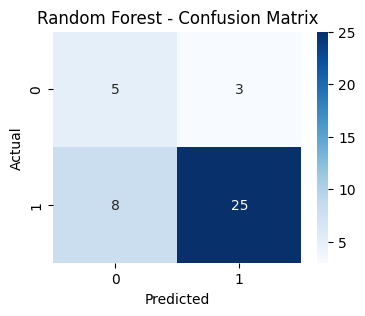


Gradient Boosting:
Accuracy: 0.8536585365853658
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.75      0.67         8
           1       0.94      0.88      0.91        33

    accuracy                           0.85        41
   macro avg       0.77      0.81      0.79        41
weighted avg       0.87      0.85      0.86        41



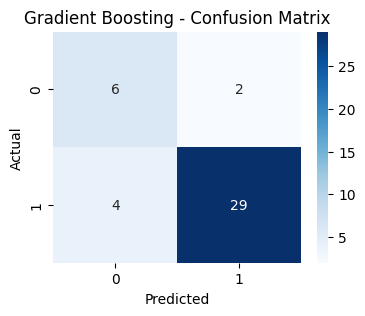

In [45]:
# Step 4: Model Evaluation

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
}

results = {}

for name, model in models.items():
    # Train
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    results[name] = {"accuracy": acc, "confusion_matrix": cm, "report": report}

    print(f"\n{name}:")
    print("Accuracy:", acc)
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix plot
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Neural Network (MLP) Accuracy: 0.8048780560493469


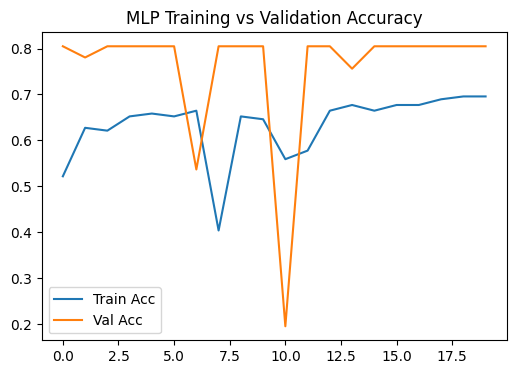

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

mlp = Sequential()
mlp.add(Dense(64, input_dim=X_train.shape[1], activation="relu"))
mlp.add(Dense(32, activation="relu"))
mlp.add(Dense(1, activation="sigmoid"))

mlp.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

history = mlp.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# Evaluate MLP
loss, acc = mlp.evaluate(X_test, y_test, verbose=0)
print("\nNeural Network (MLP) Accuracy:", acc)

# Plot training history
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("MLP Training vs Validation Accuracy")
plt.show()